#MLP ASSIGNMENT OVER MNIST DATASET 
###MLP WHICH IS APPLYING THE MULTI LAYER PERCEPTRONS WE USE THIS DEEP LEARNING TECHNIQUES WITH THE HIDDEN LAYERS WITH THE CELLS OF ACTIVATION FUNCTIONA THAT ARE INTERNALLY CONNECTED AND PEFORM THE BACKPRPOGATION INORDER TO REDUCE THE LOSS BETWEEN PREDICTED VALUE AND THE ACTUAL VALUE. WE USE THE OPTIMIASTION FUNCTIONS TO MINIMISE THE LOSS OF STOCHASTIC GRADIENT DESCENT  WE WILL CONVERGE TO MINIMISE OUT LOSS. WE WILL TRAIN MODELS AND VALIDATE THE MODELS USING THE TEST DATA.

In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal


Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time


In [0]:
def dynamicplot(x,validationy,testy,ax):
  ax.plot(x,validationy,label='validatiomn loss')
  ax.plot(x,testy,label='testloss')
  plt.xlabel('epoch')
  plt.ylabel('categroicalcrossentropy')
  plt.legend()
  plt.show()

In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(xtrain[0][27])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
#the imput is of shape 3dimensional vector
print(xtrain.shape)

(60000, 28, 28)


In [0]:
#we want it as 60000data points and reshape data as 784 which data is 784 pixels
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1]*xtrain.shape[2])
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1]*xtest.shape[2])
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [0]:
print(ytrain.shape)

(60000,)


In [0]:
#the values are between 0 and 255
#normalixzing  the data
xtrain=xtrain/255
xtest=xtest/255

In [0]:
print(xtrain[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
print(xtrain[0].shape)

(784,)


In [0]:
#onehot encode the ytrain just comnverting the features into ccategorical
ytrain=np_utils.to_categorical(ytrain,10)
ytest=np_utils.to_categorical(ytest,10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers.normalization import BatchNormalization

outputdimensions=10
inputdimensions=xtrain.shape[1]
print(inputdimensions)

784


In [0]:
print(ytest.shape)
print(xtest.shape)

(10000, 10)
(10000, 784)


In [0]:
model=Sequential()
model.add(Dense(364,input_dim=inputdimensions,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(52,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,batch_size=128,epochs=20,validation_data=(xtest,ytest),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 291us/step - loss: 0.5176 - acc: 0.8458 - val_loss: 0.1616 - val_acc: 0.9501
Epoch 2/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.2525 - acc: 0.9274 - val_loss: 0.1228 - val_acc: 0.9627
Epoch 3/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.2003 - acc: 0.9425 - val_loss: 0.1027 - val_acc: 0.9691
Epoch 4/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.1701 - acc: 0.9508 - val_loss: 0.0916 - val_acc: 0.9721
Epoch 5/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.1530 - acc: 0.9551 - val_loss: 0.0858 - val_acc: 0.9741
Epoch 6/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.1368 - acc: 0.9608 - val_loss: 0.0807 - val_acc: 0.9745
Epoch 7/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.1283 - acc: 0.9625 - val_loss: 0.

In [0]:
score=model.evaluate(xtest,ytest,verbose=0)
print('test score',score[0])
print('test accuracy',score[1])

test score 0.0621104669367196
test accuracy 0.9816


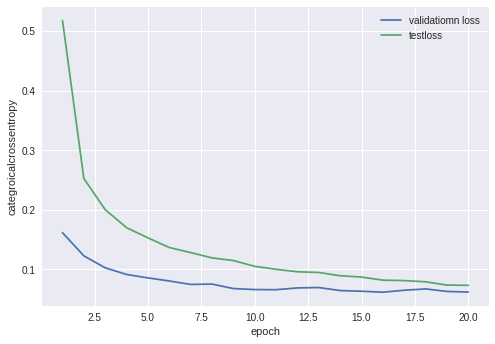

In [0]:
fig,ax=plt.subplots()
x=list(range(1,21))
validationy=history.history['val_loss']
testy=history.history['loss']
dynamicplot(x,validationy,testy,ax)

In [0]:
model1=Sequential()
model1.add(Dense(364,input_dim=inputdimensions,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(512,input_dim=inputdimensions,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(52,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(10,activation='softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model1.fit(xtrain,ytrain,batch_size=128,epochs=20,validation_data=(xtest,ytest),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 441us/step - loss: 0.3885 - acc: 0.8828 - val_loss: 0.1358 - val_acc: 0.9583
Epoch 2/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.1926 - acc: 0.9423 - val_loss: 0.1065 - val_acc: 0.9677
Epoch 3/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.1561 - acc: 0.9535 - val_loss: 0.0942 - val_acc: 0.9706
Epoch 4/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.1291 - acc: 0.9618 - val_loss: 0.0854 - val_acc: 0.9735
Epoch 5/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.1197 - acc: 0.9640 - val_loss: 0.0748 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.1115 - acc: 0.9664 - val_loss: 0.0766 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.1025 - acc: 0.9685 - val_loss: 0.

In [0]:
score=model.evaluate(xtest,ytest,verbose=0)
print('test score',score[0])
print('test accuracy',score[1])

test score 0.0621104669367196
test accuracy 0.9816


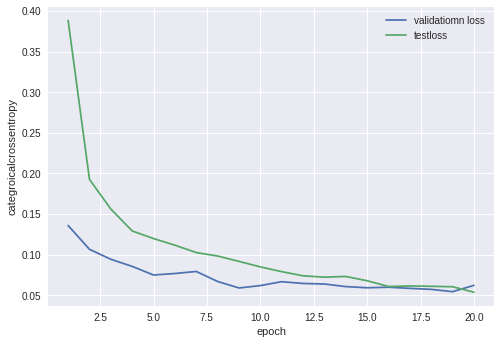

In [0]:
fig,ax=plt.subplots()
x=list(range(1,21))
validationy=history.history['val_loss']
testy=history.history['loss']
dynamicplot(x,validationy,testy,ax)

In [0]:
model2=Sequential()
model2.add(Dense(364,input_dim=inputdimensions,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(512,input_dim=inputdimensions,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(784,input_dim=inputdimensions,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(512,input_dim=inputdimensions,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(200,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.6))
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model2.fit(xtrain,ytrain,batch_size=128,epochs=20,validation_data=(xtest,ytest),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s 469us/step - loss: 0.5001 - acc: 0.8530 - val_loss: 0.1449 - val_acc: 0.9583
Epoch 2/20
60000/60000 [==============================] - 26s 435us/step - loss: 0.1877 - acc: 0.9456 - val_loss: 0.1093 - val_acc: 0.9699
Epoch 3/20
60000/60000 [==============================] - 26s 434us/step - loss: 0.1483 - acc: 0.9575 - val_loss: 0.0906 - val_acc: 0.9734
Epoch 4/20
60000/60000 [==============================] - 26s 434us/step - loss: 0.1207 - acc: 0.9648 - val_loss: 0.1021 - val_acc: 0.9707
Epoch 5/20
60000/60000 [==============================] - 26s 432us/step - loss: 0.1090 - acc: 0.9682 - val_loss: 0.0855 - val_acc: 0.9740
Epoch 6/20
60000/60000 [==============================] - 26s 434us/step - loss: 0.0957 - acc: 0.9720 - val_loss: 0.0856 - val_acc: 0.9747
Epoch 7/20
60000/60000 [==============================] - 26s 433us/step - loss: 0.0884 - acc: 0.9749 - val_loss: 0.

In [0]:
score=model.evaluate(xtest,ytest,verbose=0)
print('test score',score[0])
print('test accuracy',score[1])

test score 0.07184817352769897
test accuracy 0.9785


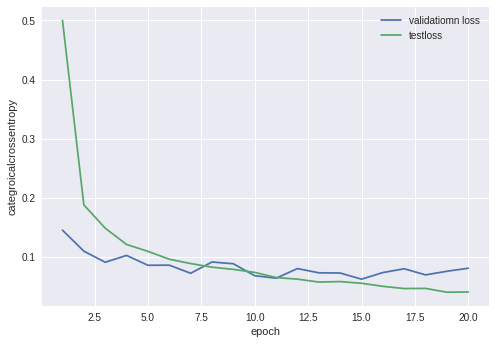

In [0]:
fig,ax=plt.subplots()
x=list(range(1,21))
validationy=history.history['val_loss']
testy=history.history['loss']
dynamicplot(x,validationy,testy,ax)

In [0]:
model3=Sequential()
model3.add(Dense(364,input_dim=inputdimensions,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(512,input_dim=inputdimensions,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(52,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(10,activation='softmax'))
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model3.fit(xtrain,ytrain,batch_size=128,epochs=20,validation_data=(xtest,ytest),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.1939 - acc: 0.9429 - val_loss: 0.1124 - val_acc: 0.9655
Epoch 2/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0750 - acc: 0.9768 - val_loss: 0.0809 - val_acc: 0.9734
Epoch 3/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0488 - acc: 0.9845 - val_loss: 0.0829 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0793 - val_acc: 0.9748
Epoch 5/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0313 - acc: 0.9897 - val_loss: 0.0809 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0275 - acc: 0.9910 - val_loss: 0.0745 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0230 - acc: 0.9925 - val_loss: 0.

In [0]:
score=model.evaluate(xtest,ytest,verbose=0)
print('test score',score[0])
print('test accuracy',score[1])

test score 0.12161973871234805
test accuracy 0.9695


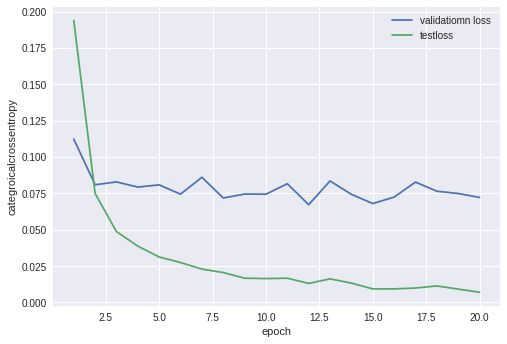

In [0]:
fig,ax=plt.subplots()
x=list(range(1,21))
validationy=history.history['val_loss']
testy=history.history['loss']
dynamicplot(x,validationy,testy,ax)

In [0]:
model4=Sequential()
model4.add(Dense(364,input_dim=inputdimensions,activation='relu'))
model4.add(Dense(512,input_dim=inputdimensions,activation='relu'))
model4.add(Dense(20,input_dim=inputdimensions,activation='relu'))
model4.add(Dense(10,input_dim=inputdimensions,activation='relu'))
model4.add(Dense(60,input_dim=inputdimensions,activation='relu'))
model4.add(Dense(52,activation='relu'))
model4.add(Dense(10,activation='softmax'))
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history1=model4.fit(xtrain,ytrain,batch_size=128,epochs=20,validation_data=(xtest,ytest),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 328us/step - loss: 0.3797 - acc: 0.8813 - val_loss: 0.1399 - val_acc: 0.9600
Epoch 2/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.1165 - acc: 0.9656 - val_loss: 0.1081 - val_acc: 0.9672
Epoch 3/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.0787 - acc: 0.9764 - val_loss: 0.0844 - val_acc: 0.9759
Epoch 4/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.0594 - acc: 0.9820 - val_loss: 0.0892 - val_acc: 0.9752
Epoch 5/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.0448 - acc: 0.9858 - val_loss: 0.0905 - val_acc: 0.9742
Epoch 6/20
60000/60000 [==============================] - 15s 248us/step - loss: 0.0362 - acc: 0.9886 - val_loss: 0.0816 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.0316 - acc: 0.9901 - val_loss: 0.

In [0]:
score=model.evaluate(xtest,ytest,verbose=0)
print('test score',score[0])
print('test accuracy',score[1])

test score 0.12161973871234805
test accuracy 0.9695


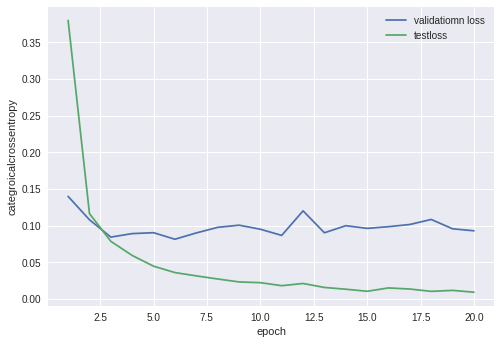

In [0]:
fig,ax=plt.subplots()
x=list(range(1,21))
validationy=history1.history['val_loss']
testy=history1.history['loss']
dynamicplot(x,validationy,testy,ax)

with out dropouts and batchnormalisation the test accuracy is decreasing

#DOCUMENTATION CONCLUSION AND KEYTAKEAWAYS. 

In [0]:
import pandas as pd

data = [[3,[364,562,10],0.06,0.982,'yes','yes'],[4,[364,512,52,10],0.071,0.9785,'yes','yes'],[6,[364,512,784,512,200,10],0.06,0.9785,'yes','yes'],[6,[364,512,784,512,200,10],0.06,0.96,'no','yes'],[6,[364,512,784,512,200,10],0.06,0.96,'no','no'] ]
pd.DataFrame(data, columns=["number of layers",'layers', "testscore",'testsccuracy','using_dropouts','using_batch_normalisation'],index=['1','2','3','4','5'])


,number of layers,layers,testscore,testsccuracy,using_dropouts,using_batch_normalisation
1,3,"[364, 562, 10]",0.060,0.9820,yes,yes
2,4,"[364, 512, 52, 10]",0.071,0.9785,yes,yes
3,6,"[364, 512, 784, 512, 200, 10]",0.060,0.9785,yes,yes
4,6,"[364, 512, 784, 512, 200, 10]",0.060,0.9785,no,yes
5,6,"[364, 512, 784, 512, 200, 10]",0.060,0.9785,no,no


### AS THE PART OF ASSIGNEMENT TASKWE USE THE MULTIPLE HIDDEN LAYERS WITH THE DIFFERENT DROPOUT RATES AND BATCH NORMALISATION LAYER. WE USE THE DROPUTS TO PREVENT THE MODEL FORM OVERFITTING WE WILL SWITH OF THE SOME OF THE CELLS IN THE HIDDEN LAYER BASED ON THE PERCENTAGE OF DROPOUT.WE ALSO USE THE BATCH NORMALISATION LAYER TO PERFORM THE BATCHNORMALISATION BECAUSE AFTER WE SEND THE DATA THROUGH THE ACTIVATION FUNCTIONS AND SUMMING WIL HAPPEN OVER THE DATA WHICH LEADS THE DATA TO LOOSE OTS ORIGINAL BEHAVIOR SO WE USE THE BATCH NORMALISATION TO NORMALIE THE DATA . 

### WE HAVE LOADED THE DATA AND NORMALISED THE OBTAINED DATA.WE CAN USE DIFFERENT ACTIVATION FUNCTIONS LIKE SIGMOID,RELU,TANH AND PERFORM THE ACTIVATION. WE FIT THE DATA. WE VARIED THE NUMBER OF DENSE LAYERS AND THE NUMBER OF CELLS IN THE EACH LAYER AND OBSERVED HOE THE MODEL IS CONVERGING REDUCING THE LOSS OF CATEGORICAL CROSS ENTROPY.WE USING THE GRAPH WE VISUALISED THE MODEL IS CONVERGING AND DEVIATING AND AGAIN CONVERGING O REDUCE ERROR. THE MAIN THING IS WE GONNA CONSIDER THE OUTPUT LAYER AS THE SOFTMAX LAYER IN WHICH THE OUTPUT IS TAKEN IN THE FORM OF PROBABILITIES THAT IT BELONGS T0 EACH CLASS LABEL AND WE TAKE MAXIMUM OUT OF THAT PROBABILITY.

###IF WE OBSERVE WE HAVE OBTAINED THE MORE ACCURACY WITH THE SIMPLE MODEL ITESELF USING THE BATCH NORMALISATION AND DROPOUT LAYER . IF WE OBSERVE THE MODELS PERFORMNCE IS REDUCING WHEN THE DROPOUTS AND BATCH NORMALISATION  ARE NOT USED.

### WITH SIMPLE DEEPLEARNING MODEL OF MLP WITHOUT ANY FEATUERS WE ARE ABLE TOACHIEVE ACCURACY OF 98 PERCENT.